
## 📂 Dataset: Iris Flower Dataset
The Iris dataset contains measurements of 150 iris flowers from 3 different species:

- Features (all float):  
  - Sepal Length (cm)  
  - Sepal Width (cm)  
  - Petal Length (cm)  
  - Petal Width (cm)  
- Target (int):  
  - 0 = Setosa  
  - 1 = Versicolor  
  - 2 = Virginica


In [ ]:

from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 1️⃣ VECTORS: Foundations of Data Representation


### 🧠 What is a Vector?
A **vector** is a 1D array of numbers. Each row in the Iris dataset is a **feature vector** describing a flower.


In [ ]:

import numpy as np

# Get the first sample
sample = iris_df.iloc[0, :-1].values
print("Feature Vector (1st flower):", sample)
print("Shape:", sample.shape)


Feature Vector (1st flower): [5.1 3.5 1.4 0.2]
Shape: (4,)


### ➕ Vector Operations

In [ ]:

# Select two vectors
v1 = iris_df.iloc[0, :-1].values
v2 = iris_df.iloc[1, :-1].values

# Addition
add = v1 + v2

# Dot Product
dot = np.dot(v1, v2)

# Euclidean Distance
distance = np.linalg.norm(v1 - v2)

print("Addition:", add)
print("Dot Product:", dot)
print("Euclidean Distance:", distance)


Addition: [10.   6.5  2.8  0.4]
Dot Product: 37.489999999999995
Euclidean Distance: 0.5385164807134502


## 2️⃣ STATISTICS: Understand the Data

In [ ]:

# Using pandas to get descriptive statistics
stats = iris_df.describe()
stats


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### 🧮 Compute Mean

In [ ]:

# Mean of each feature
mean_vec = iris_df.iloc[:, :-1].mean()
print("Mean Vector:\n", mean_vec)


Mean Vector:
 sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64


### 📉 Variance & Standard Deviation

In [ ]:

# Variance and Std Dev
var = iris_df.var()
std = iris_df.std()

print("Variance:\n", var)
print("Standard Deviation:\n", std)


Variance:
 sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
target               0.671141
dtype: float64
Standard Deviation:
 sepal length (cm)    0.828066
sepal width (cm)     0.435866
petal length (cm)    1.765298
petal width (cm)     0.762238
target               0.819232
dtype: float64


## 3️⃣ MATRICES: Structure of the Entire Dataset

In [ ]:

X = iris_df.iloc[: , :-1].values
print("Data Matrix Shape:", X.shape)


Data Matrix Shape: (150, 4)


### 🧭 Matrix Operations

In [ ]:

# Transpose
X_T = X.T
print("Transpose Shape:", X_T.shape)

# Covariance Matrix
cov_matrix = np.cov(X_T)
print("Covariance Matrix:\n", cov_matrix)


Transpose Shape: (4, 150)
Covariance Matrix:
 [[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]


## 📊 Visualization

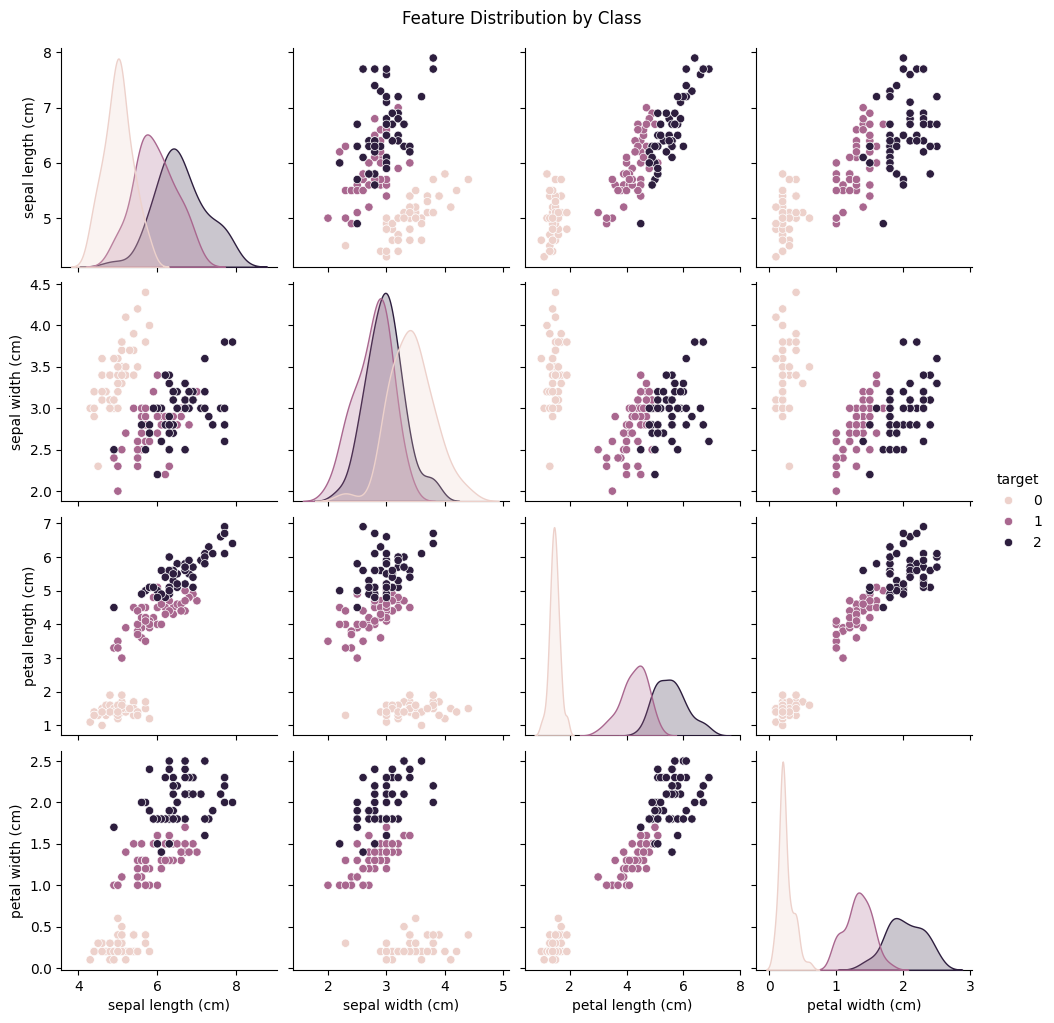

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(iris_df, hue='target')
plt.suptitle("Feature Distribution by Class", y=1.02)
plt.show()


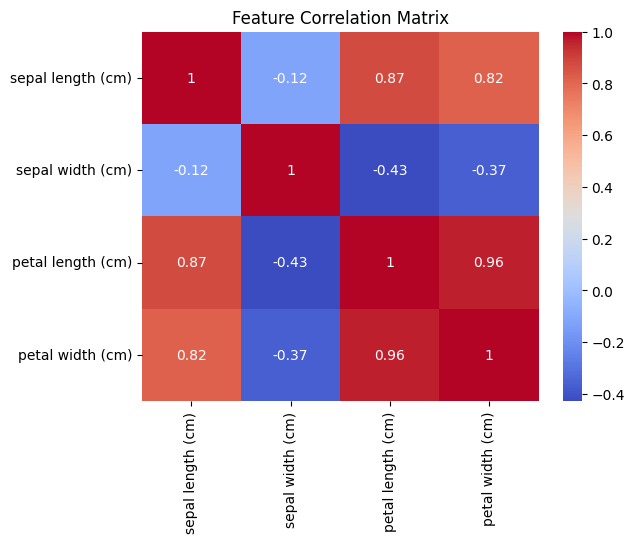

In [ ]:

corr = iris_df.iloc[:, :-1].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()



## 🏁 Summary

| Concept   | Representation |
|-----------|----------------|
| Vector    | Single flower (4 features) |
| Matrix    | All flowers' features `(150 x 4)` |
| Stats     | Describe dataset: mean, variance, std |
| ML Utility | Features as vectors, model learns using matrix ops |


## 🤖  Simple Machine Learning Model (Classifier)

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Prepare features and target
X = iris_df.iloc[:, :-1].values
y = iris_df['target'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:", classification_report(y_test, y_pred))


Accuracy: 1.0
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



## 🧭 Visualizing Feature Vectors in 2D

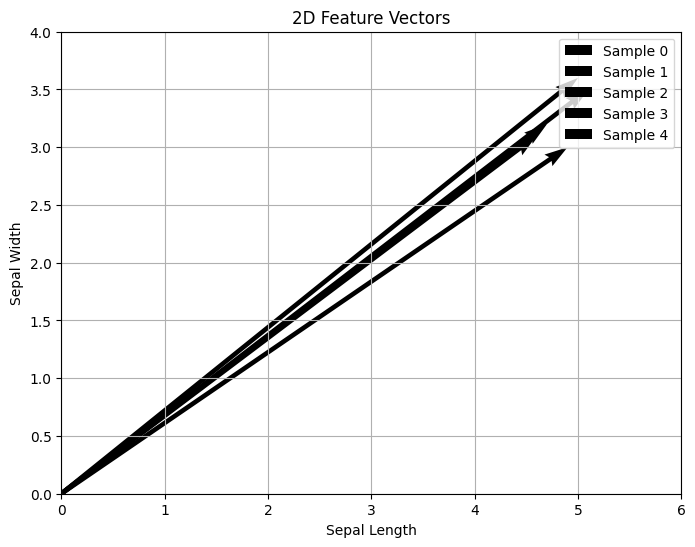

In [ ]:

# Select two features and plot them as vectors from the origin
plt.figure(figsize=(8,6))

# Only first 5 vectors to keep it clean
for i in range(5):
    vec = X[i, :2]
    plt.quiver(0, 0, vec[0], vec[1], angles='xy', scale_units='xy', scale=1, label=f'Sample {i}')

plt.xlim(0, 6)
plt.ylim(0, 4)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('2D Feature Vectors')
plt.grid()
plt.legend()
plt.show()
